In [17]:
%pip install pandas matplotlib seaborn plotly


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [19]:
df = pd.read_csv("US_Accidents_March23.csv")
df.shape

<ipython-input-19-dec129e3bb66>:1: DtypeWarning:

Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.



(465862, 46)

In [20]:
df.head()
df.info()
df.describe()
df.isnull().sum() / len(df) * 100  # Check missing values %


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465862 entries, 0 to 465861
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     465862 non-null  object 
 1   Source                 465862 non-null  object 
 2   Severity               465862 non-null  int64  
 3   Start_Time             465862 non-null  object 
 4   End_Time               465862 non-null  object 
 5   Start_Lat              465862 non-null  float64
 6   Start_Lng              465862 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           465862 non-null  float64
 10  Description            465862 non-null  object 
 11  Street                 465861 non-null  object 
 12  City                   465841 non-null  object 
 13  County                 465861 non-null  object 
 14  State                  465861 non-nu

ID                         0.000000
Source                     0.000000
Severity                   0.000000
Start_Time                 0.000000
End_Time                   0.000000
Start_Lat                  0.000000
Start_Lng                  0.000000
End_Lat                  100.000000
End_Lng                  100.000000
Distance(mi)               0.000000
Description                0.000000
Street                     0.000215
City                       0.004508
County                     0.000215
State                      0.000215
Zipcode                    0.011591
Country                    0.000215
Timezone                   0.011591
Airport_Code               0.011806
Weather_Timestamp          0.820200
Temperature(F)             1.462665
Wind_Chill(F)             86.657637
Humidity(%)                1.600045
Pressure(in)               1.155707
Visibility(mi)             2.130245
Wind_Direction             0.827069
Wind_Speed(mph)           17.971416
Precipitation(in)         89

In [21]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%d-%m-%Y %H:%M', errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day
df['Month'] = df['Start_Time'].dt.month
df['Weekday'] = df['Start_Time'].dt.day_name()


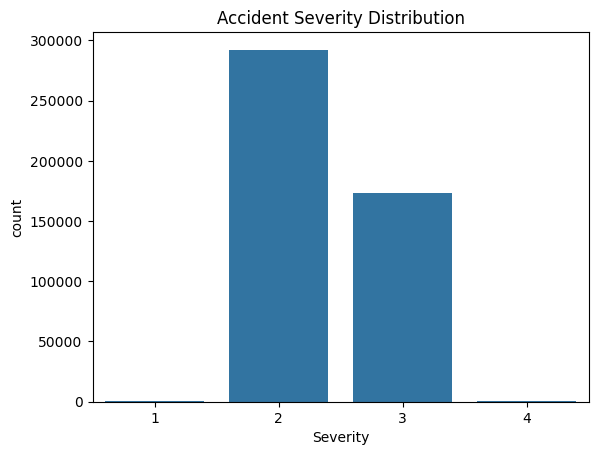

In [22]:
sns.countplot(x='Severity', data=df)
plt.title("Accident Severity Distribution")
plt.show()


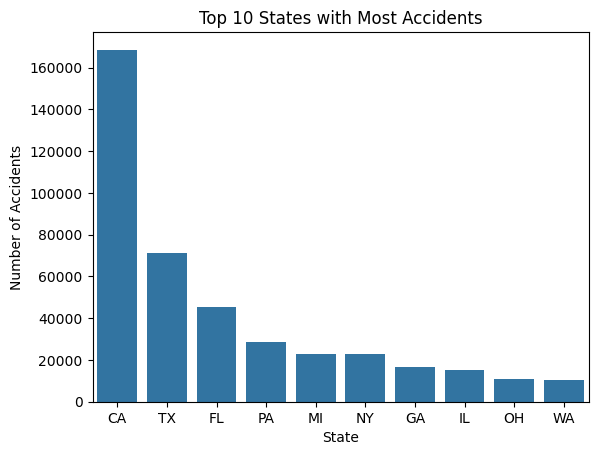

In [23]:
top_states = df['State'].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values)
plt.title("Top 10 States with Most Accidents")
plt.ylabel("Number of Accidents")
plt.show()



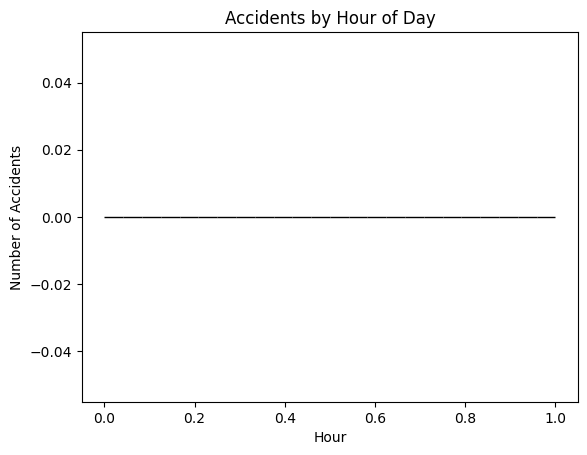

In [24]:
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()


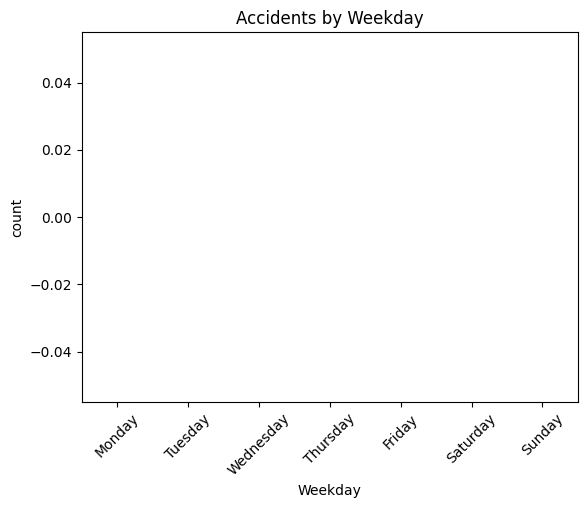

In [25]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='Weekday', order=weekday_order)
plt.title("Accidents by Weekday")
plt.xticks(rotation=45)
plt.show()


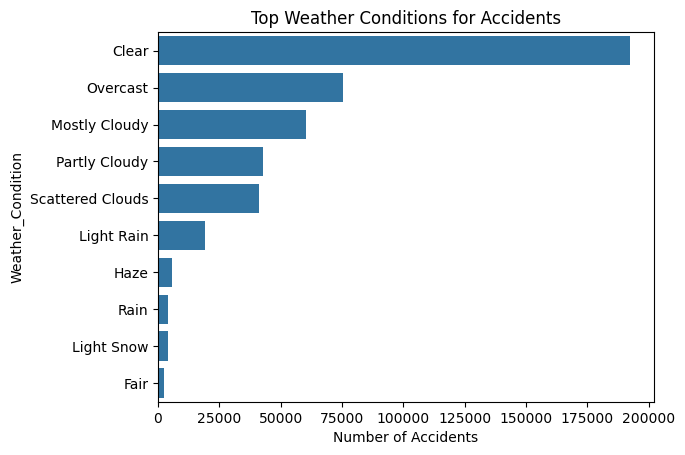

In [26]:
top_weather = df['Weather_Condition'].value_counts().head(10)
sns.barplot(x=top_weather.values, y=top_weather.index)
plt.title("Top Weather Conditions for Accidents")
plt.xlabel("Number of Accidents")
plt.show()


In [27]:
import pandas as pd
import plotly.express as px

# Sample 10,000 points safely
sample_df = df[['Start_Lat', 'Start_Lng']].dropna()

# Only sample if there are enough rows
if len(sample_df) > 10000:
    sample_df = sample_df.sample(10000)

# Create the scatter map
fig = px.scatter_map(
    sample_df,
    lat='Start_Lat',
    lon='Start_Lng',
    zoom=3,
    height=500,
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title='Sample Accident Locations in USA')

# Save to local HTML file (current folder)
fig.write_html('sample_map.html')

print("✅ Map saved as 'sample_map.html' in your current folder!")


✅ Map saved as 'sample_map.html' in your current folder!


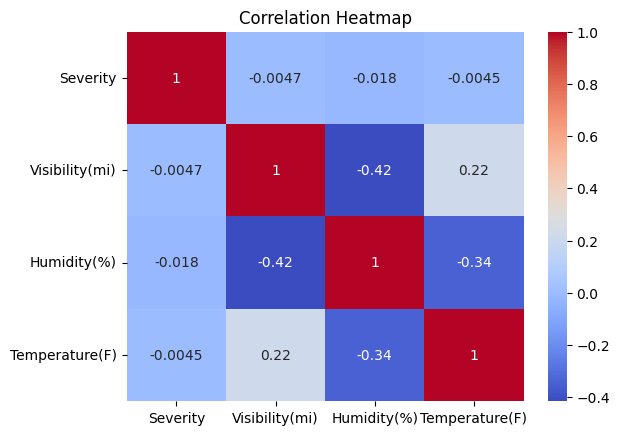

In [28]:
corr = df[['Severity', 'Visibility(mi)', 'Humidity(%)', 'Temperature(F)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
